## Car Sales Analysis

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os


from google.colab import drive
!gdown "https://drive.google.com/uc?id=1Js7WK-h9kU7ImN_N10VXBwJDPsRS5BzA&confirm=t"

data = pd.read_csv('car_prices.csv')



data.dropna(inplace=True)


# Unique values printed for selection options for the prediction tool. used with state, body, make, and transmission.
# print(sorted(data['state'].unique()))

data = data.join(pd.get_dummies(data.make)).drop(['make'], axis=1)
data = data.drop(['model'], axis=1)
data = data.drop(['trim'], axis=1)
data = data.join(pd.get_dummies(data.body)).drop(['body'], axis=1)
data = data.join(pd.get_dummies(data.transmission)).drop(['transmission'], axis=1)
data = data.join(pd.get_dummies(data.state)).drop(['state'], axis=1)
data = data.drop(['color'], axis=1)
data = data.drop(['interior'], axis=1)
data = data.drop(['seller'], axis=1)
data = data.drop(['mmr'], axis=1)
data = data.drop(['saledate'], axis=1)
data = data.drop(['vin'], axis=1)


data.describe()


Downloading...
From: https://drive.google.com/uc?id=1Js7WK-h9kU7ImN_N10VXBwJDPsRS5BzA&confirm=t
To: /content/car_prices.csv
100% 88.0M/88.0M [00:01<00:00, 58.0MB/s]


,year,condition,odometer,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13690.512058
std,3.822151,13.286866,51939.586894,9613.033738
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18200.000000
max,2015.000000,49.000000,999999.000000,230000.000000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'sellingprice'}>]], dtype=object)

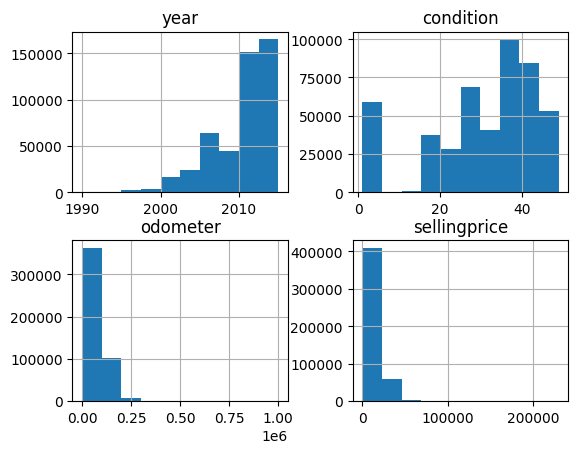

In [ ]:
data.hist()

According to the above histogram, the dataset primarily represents newer, lightly driven cars in a wide variety of conditions.

Axes(0.125,0.11;0.775x0.77)


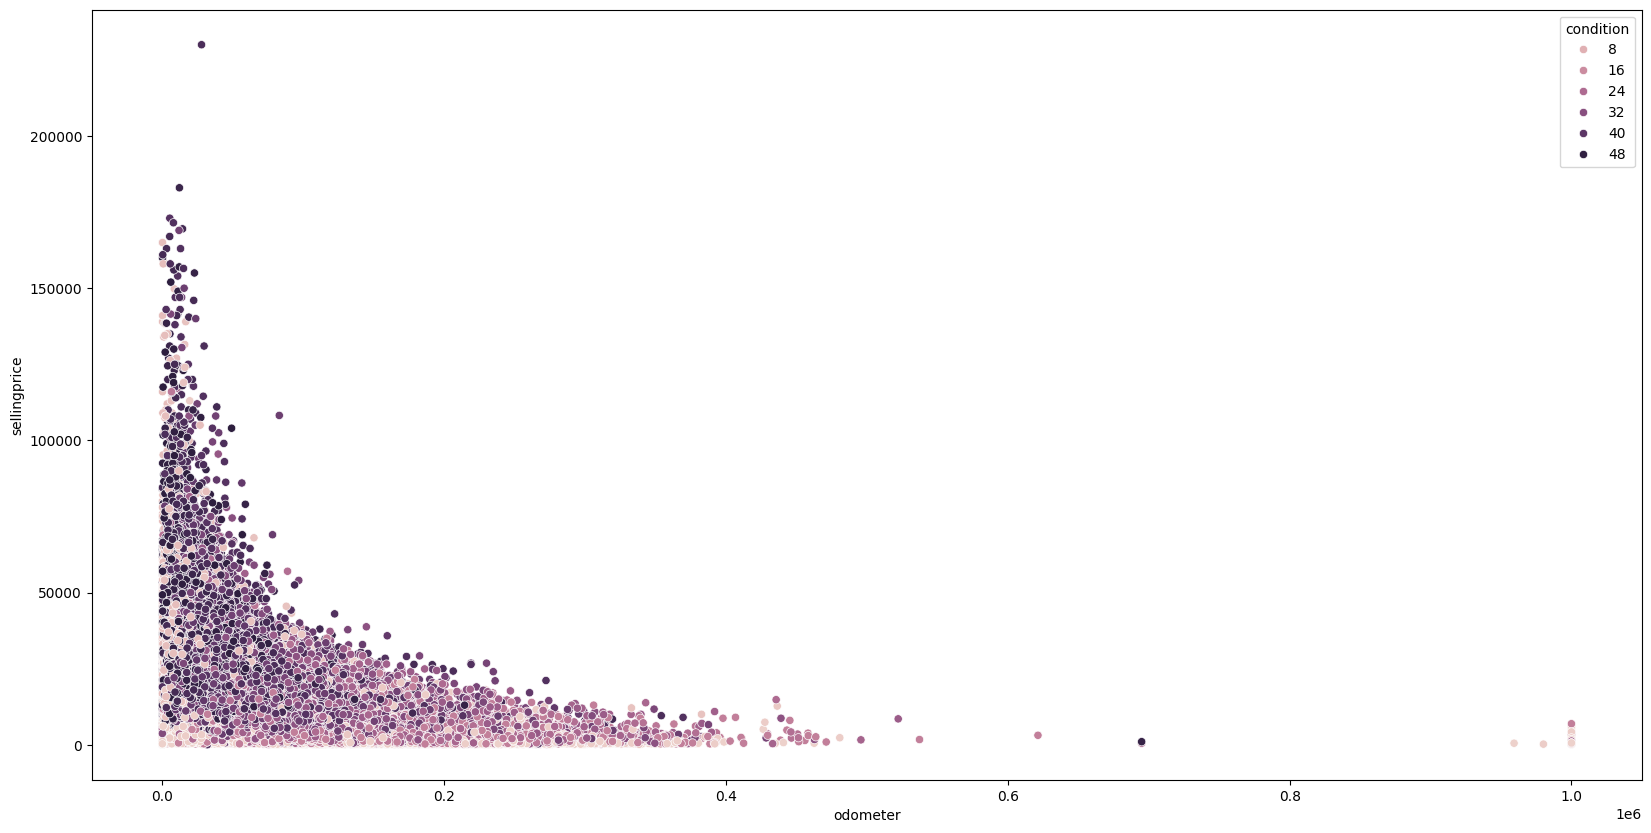

In [ ]:
plt.figure(figsize=(20, 10))
print(sns.scatterplot(x="odometer", y="sellingprice", hue= "condition", data=data))

As the odometer value increases, the condition and selling price trend downwards

## Car Sales Price Prediction Model

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import and preprocessing
data = pd.read_csv('car_prices.csv')
data.dropna(inplace=True)

data = data.join(pd.get_dummies(data.make)).drop(['make'], axis=1)
data = data.drop(['model'], axis=1)
data = data.drop(['trim'], axis=1)
data = data.join(pd.get_dummies(data.body)).drop(['body'], axis=1)
data = data.join(pd.get_dummies(data.transmission)).drop(['transmission'], axis=1)
data = data.join(pd.get_dummies(data.state)).drop(['state'], axis=1)
data = data.drop(['color'], axis=1)
data = data.drop(['interior'], axis=1)
data = data.drop(['seller'], axis=1)
data = data.drop(['mmr'], axis=1)
data = data.drop(['saledate'], axis=1)
data = data.drop(['vin'], axis=1)



X = data.drop(['sellingprice'], axis=1)
y = data['sellingprice']

#print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

#validation
y_pred = model.predict(X_test)


print("R2 score is ", r2_score(y_test, y_pred))


year = widgets.Text(value='', placeholder='Enter year', description='Year:')
make = widgets.Dropdown(
    options=['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker',
             'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus',
             'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab',
             'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'],
    description='Make',
    disabled=False,
)
body = widgets.Dropdown(
    options=['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon', 'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
             'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab', 'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
             'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe', 'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback', 'King Cab', 'Koup',
             'Mega Cab', 'Minivan', 'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab', 'Ram Van', 'Regular Cab', 'SUV', 'Sedan',
             'SuperCab', 'SuperCrew', 'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab', 'access cab', 'beetle convertible', 'cab plus 4',
             'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'double cab', 'e-series van', 'elantra coupe',
             'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup',
             'mega cab', 'minivan', 'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab', 'regular cab', 'regular-cab', 'sedan', 'supercab', 'supercrew',
             'suv', 'transit van', 'tsx sport wagon', 'van', 'wagon', 'xtracab'],
    description='Body',
    disabled=False,
)
transmission = widgets.Dropdown(
    options=['automatic', 'manual'],
    description='Transmission',
    disabled=False,
)
state = widgets.Dropdown(
    options=['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj',
             'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'sc', 'tn', 'tx', 'ut', 'va', 'wa', 'wi'],
    description='State',
    disabled=False,
)
condition = widgets.IntSlider(
    min=0,
    max=49,
    step=1,
    description='Condition',

)
odometer = widgets.IntText(value=0, description='Odometer:')


predict_button = widgets.Button(description="Predict Selling Price")
predicted_price = 0
form_make = 'aaa'
form_odometer = 0
# Function to collect input and make a prediction
def collect_data_and_predict(b):
    global predicted_price
    global form_make
    global form_odometer
    new_entry = {
        'year': int(year.value),
        'odometer': odometer.value,
        'condition': condition.value,

    }


    entry_df = pd.DataFrame([new_entry])
    form_make = make.value
    form_odometer = odometer.value


    if f'{make.value}' not in X.columns:
        print(f"Make '{make.value}' is not recognized. Please enter a valid make.")
        return
    if f'{body.value}' not in X.columns:
        print(f"Body '{body.value}' is not recognized. Please enter a valid body type.")
        return
    if f'{transmission.value}' not in X.columns:
        print(f"Transmission '{transmission.value}' is not recognized. Please enter a valid transmission.")
        return
    if f'{state.value}' not in X.columns:
        print(f"State '{state.value}' is not recognized. Please enter a valid state.")
        return


    entry_df[f'{make.value}'] = 1
    entry_df[f'{body.value}'] = 1
    entry_df[f'{transmission.value}'] = 1
    entry_df[f'{state.value}'] = 1


    #entry_df = entry_df.join(pd.get_dummies([make.value], prefix='make'))
    #entry_df = entry_df.join(pd.get_dummies([body.value], prefix='body'))
    #entry_df = entry_df.join(pd.get_dummies([transmission.value], prefix='transmission'))
    #entry_df = entry_df.join(pd.get_dummies([state.value], prefix='state'))


    entry_df_aligned = entry_df.reindex(columns=X.columns, fill_value=0)


    predicted_price = model.predict(entry_df_aligned)[0]

    print(f"Predicted Selling Price: ${predicted_price:.2f}")



    filtered_data = data[data[form_make] == 1]

    plt.figure(figsize=(8, 6))


    sns.scatterplot(data=filtered_data, x='odometer', y='sellingprice', label=f'Other {form_make} Cars', color='blue')


    plt.scatter(form_odometer, predicted_price, color='red', label='Predicted Car Value', s=100, marker='X')


    plt.title(f"Predicted Car Value vs. {form_make} Cars")
    plt.xlabel('Odometer (miles)')
    plt.ylabel('Selling Price')
    plt.legend()


    plt.grid(True)
    plt.show()


predict_button.on_click(collect_data_and_predict)


display(year, make, body, transmission, state, condition, odometer, predict_button)

R2 score is  0.6889219344511488


Text(value='', description='Year:', placeholder='Enter year')

Dropdown(description='Make', options=('Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', …

Dropdown(description='Body', options=('Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon', 'CTS-V Cou…

Dropdown(description='Transmission', options=('automatic', 'manual'), value='automatic')

Dropdown(description='State', options=('al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md',…

IntSlider(value=0, description='Condition', max=49)

IntText(value=0, description='Odometer:')

Button(description='Predict Selling Price', style=ButtonStyle())